In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

data = pd.read_csv('ImageObjectKalmanFilteringTraceCar.txt')
td = 1.0/25.0
blue_car = data.loc[data['id']==32]
blue_car.head()

,time,id,x_min_p,x_max_p,y_min_p,y_max_p,x_min_m,x_max_m,y_min_m,y_max_m,...,do_c7,do_c8,io_c1,io_c2,io_c3,io_c4,io_c5,io_c6,io_c7,io_c8
345,2.32,32,269.0,396.0,171.0,238.0,310.0,416.0,179.0,239.0,...,0.07,0.14,0.12,0.01,0.0,0.01,0.24,0.35,0.08,0.18
349,2.36,32,310.0,416.0,179.0,239.0,304.0,417.0,174.0,239.0,...,0.08,0.14,0.12,0.01,0.0,0.01,0.24,0.35,0.08,0.18
356,2.40,32,304.0,417.0,174.0,239.0,300.0,419.0,172.0,241.0,...,0.09,0.13,0.12,0.01,0.0,0.01,0.24,0.35,0.08,0.18
361,2.44,32,300.0,419.0,172.0,241.0,304.0,415.0,178.0,241.0,...,0.09,0.13,0.12,0.01,0.0,0.01,0.24,0.35,0.08,0.18
366,2.48,32,304.0,415.0,178.0,241.0,296.0,415.0,175.0,241.0,...,0.07,0.11,0.12,0.01,0.0,0.01,0.24,0.35,0.08,0.18


In [3]:
blue_car.shape

(150, 31)

In [4]:
x_min = pd.DataFrame({'time': blue_car['time'], 'l' : blue_car['x_min_m']})
x_min.index = x_min['time']
del x_min['time']
x_min.head()

,l
time,
2.32,310.0
2.36,304.0
2.40,300.0
2.44,304.0
2.48,296.0


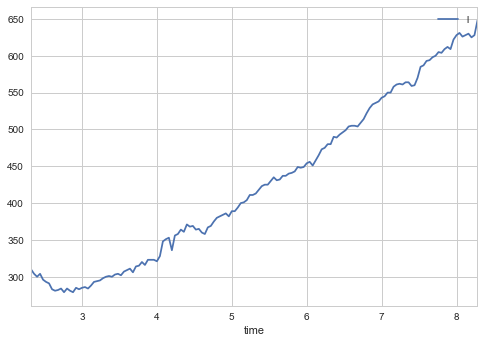

In [5]:
x_min.plot()

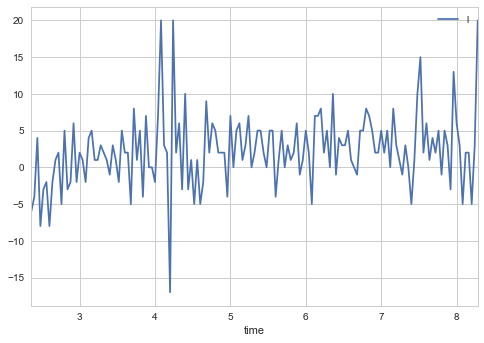

In [6]:
x_min_diff = x_min.diff(1)
x_min_diff = x_min_diff.dropna()
x_min_diff.plot()

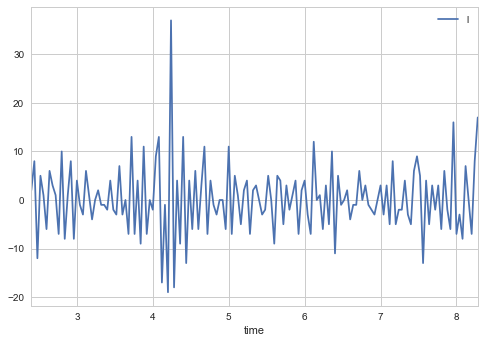

In [7]:
x_min_diff_diff = x_min_diff.diff(1)
x_min_diff_diff = x_min_diff_diff.dropna()
x_min_diff_diff.plot()

In [8]:
x_min_var = x_min.var()
x_min_diff_var = x_min_diff.var()
x_min_diff_diff_var = x_min_diff_diff.var()
print(x_min_var)
print(x_min_diff_var)
print(x_min_diff_diff_var)

l    12593.497808
dtype: float64
l    24.765282
dtype: float64
l    50.79886
dtype: float64


In [9]:
R = np.array([[100.0, 0.0],[0.0, 1000.0]]) # state equation variances
Q = np.array([10.0]) # measurent variance
A = np.array([[1.0, td],[0.0, 1.0]]) # state equation matrix
C = np.array([[1.0, 0.0]]) # measurement matrix
print(R)
print(Q)
print(A)
print(C)

[[  100.     0.]
 [    0.  1000.]]
[ 10.]
[[ 1.    0.04]
 [ 0.    1.  ]]
[[ 1.  0.]]


In [10]:
length,width = x_min.shape
print(length)
mu = np.array([[x_min['l'].iloc[0]],[0.0]])
print(mu)
sigma = np.array([[100.0, 0],[0.0, 1000.0]])
print(sigma)
x_min_m = np.array([x_min['l'].iloc[0]])
x_min_f = np.array([x_min['l'].iloc[0]])
vx_min_f = np.array([0.0])
x_min_error_prev = np.zeros((length-1,1))
x_min_error_filter = np.zeros((length-1,1))

150
[[ 310.]
 [   0.]]
[[  100.     0.]
 [    0.  1000.]]


In [11]:
for i in range(0, length):
    mu = A.dot(mu)
    if i > 0:
        x_min_error_prev[i-1] =  abs(x_min['l'].iloc[i-1] - x_min['l'].iloc[i])
        x_min_error_filter[i-1] = abs(mu[0] - x_min['l'].iloc[i])
    sigma = A.dot(sigma).dot(A.T) + R
    K = sigma.dot(C.T).dot(np.linalg.inv(C.dot(sigma).dot(C.T) + Q))
    mu = mu + K.dot(x_min['l'].iloc[i]-C.dot(mu))
    sigma = (np.eye(2)-K.dot(C)).dot(sigma)
    x_min_m = np.vstack((x_min_m, [x_min['l'].iloc[i]]))
    x_min_f = np.vstack((x_min_f, mu[0]))
    vx_min_f = np.vstack((vx_min_f, mu[1]))

In [12]:
print(x_min_m.shape)
print(x_min_f.shape)
print(vx_min_f.shape)
print(x_min_error_prev[0:3])
print(x_min_error_filter[0:3])

(151, 1)
(151, 1)
(151, 1)
[[ 6.]
 [ 4.]
 [ 4.]]
[[ 6.        ]
 [ 4.32896591]
 [ 3.98424696]]


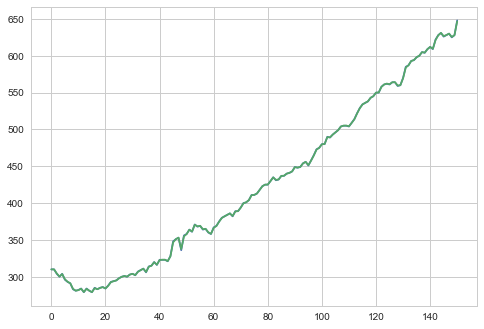

In [13]:
plt.plot(x_min_m)
plt.plot(x_min_f)

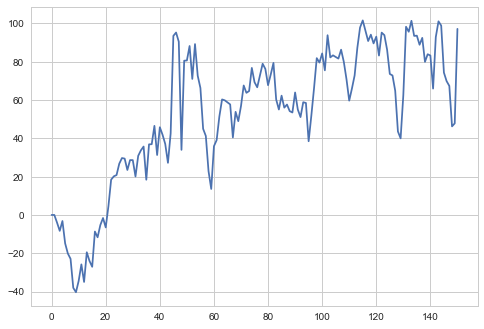

In [14]:
plt.plot(vx_min_f)

4.04026845638


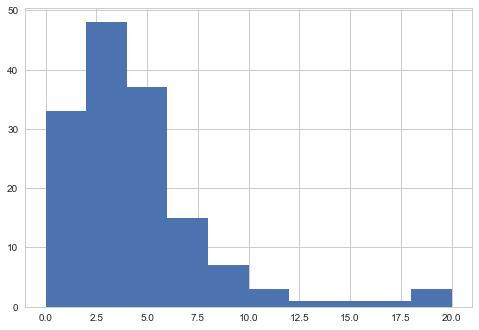

In [15]:
plt.hist(x_min_error_prev)
print(np.mean(x_min_error_prev))

3.51788701582


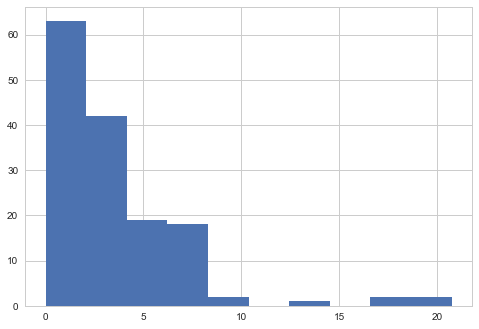

In [16]:
plt.hist(x_min_error_filter)
print(np.mean(x_min_error_filter))

In [17]:
data = pd.read_csv('ImageObjectKalmanFilteringTraceCalf.txt')
td = 1.0/29.97
calf = data.loc[data['id']==1]
calf.head()

,time,id,x_min_p,x_max_p,y_min_p,y_max_p,x_min_m,x_max_m,y_min_m,y_max_m,...,do_c7,do_c8,io_c1,io_c2,io_c3,io_c4,io_c5,io_c6,io_c7,io_c8
0,0.033,1,452.0,834.0,70.0,650.0,452.0,834.0,70.0,650.0,...,0.04,0.15,0.27,0.42,0.06,0.0,0.01,0.04,0.04,0.15
1,0.067,1,452.0,834.0,70.0,650.0,451.0,837.0,68.0,654.0,...,0.04,0.15,0.27,0.42,0.06,0.0,0.01,0.04,0.04,0.15
2,0.100,1,451.0,837.0,68.0,654.0,453.0,834.0,64.0,654.0,...,0.04,0.15,0.27,0.42,0.06,0.0,0.01,0.04,0.04,0.15
3,0.133,1,453.0,834.0,64.0,654.0,453.0,826.0,66.0,654.0,...,0.05,0.16,0.27,0.42,0.06,0.0,0.01,0.04,0.04,0.15
4,0.167,1,453.0,826.0,66.0,654.0,453.0,830.0,65.0,655.0,...,0.04,0.15,0.27,0.42,0.06,0.0,0.01,0.04,0.04,0.15


In [18]:
calf.shape

(161, 31)

In [19]:
x_min = pd.DataFrame({'time': calf['time'], 'l' : calf['x_min_m']})
x_min.index = x_min['time']
del x_min['time']
x_min.head()

,l
time,
0.033,452.0
0.067,451.0
0.100,453.0
0.133,453.0
0.167,453.0


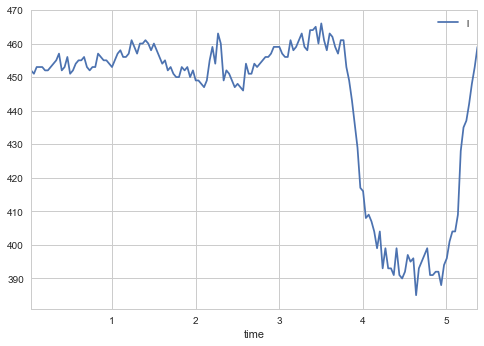

In [20]:
x_min.plot()

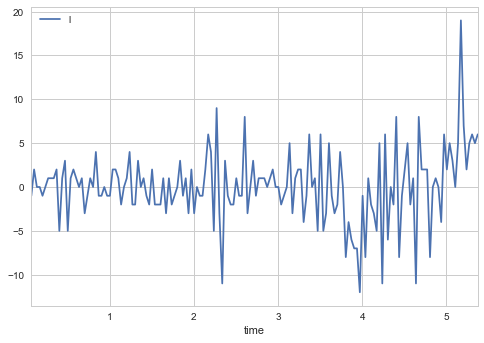

In [21]:
x_min_diff = x_min.diff(1)
x_min_diff = x_min_diff.dropna()
x_min_diff.plot()

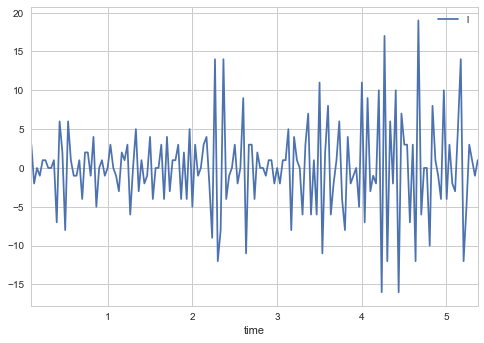

In [22]:
x_min_diff_diff = x_min_diff.diff(1)
x_min_diff_diff = x_min_diff_diff.dropna()
x_min_diff_diff.plot()

In [23]:
x_min_var = x_min.var()
x_min_diff_var = x_min_diff.var()
x_min_diff_diff_var = x_min_diff_diff.var()
print(x_min_var)
print(x_min_diff_var)
print(x_min_diff_diff_var)

l    595.999379
dtype: float64
l    16.645873
dtype: float64
l    32.865138
dtype: float64


In [24]:
R = np.array([[1.0, 0.0],[0.0, 1.0]]) # state equation variances
Q = np.array([16.0]) # measurent variance
A = np.array([[1.0, td],[0.0, 1.0]]) # state equation matrix
C = np.array([[1.0, 0.0]]) # measurement matrix
print(R)
print(Q)
print(A)
print(C)

[[ 1.  0.]
 [ 0.  1.]]
[ 16.]
[[ 1.         0.0333667]
 [ 0.         1.       ]]
[[ 1.  0.]]


In [25]:
length,width = x_min.shape
print(length)
mu = np.array([[x_min['l'].iloc[0]],[0.0]])
print(mu)
sigma = np.array([[1.0, 0],[0.0, 1.0]])
print(sigma)
x_min_m = np.array([x_min['l'].iloc[0]])
x_min_f = np.array([x_min['l'].iloc[0]])
vx_min_f = np.array([0.0])
x_min_error_prev = np.zeros((length-1,1))
x_min_error_filter = np.zeros((length-1,1))

161
[[ 452.]
 [   0.]]
[[ 1.  0.]
 [ 0.  1.]]


In [26]:
for i in range(0, length):
    mu = A.dot(mu)
    if i > 0:
        x_min_error_prev[i-1] =  abs(x_min['l'].iloc[i-1] - x_min['l'].iloc[i])
        x_min_error_filter[i-1] = abs(mu[0] - x_min['l'].iloc[i])
    sigma = A.dot(sigma).dot(A.T) + R
    K = sigma.dot(C.T).dot(np.linalg.inv(C.dot(sigma).dot(C.T) + Q))
    mu = mu + K.dot(x_min['l'].iloc[i]-C.dot(mu))
    sigma = (np.eye(2)-K.dot(C)).dot(sigma)
    x_min_m = np.vstack((x_min_m, [x_min['l'].iloc[i]]))
    x_min_f = np.vstack((x_min_f, mu[0]))
    vx_min_f = np.vstack((vx_min_f, mu[1]))

In [27]:
print(x_min_m.shape)
print(x_min_f.shape)
print(vx_min_f.shape)
print(x_min_error_prev[0:3])
print(x_min_error_filter[0:3])

(162, 1)
(162, 1)
(162, 1)
[[ 1.]
 [ 2.]
 [ 0.]]
[[ 1.        ]
 [ 1.14833092]
 [ 0.94789607]]


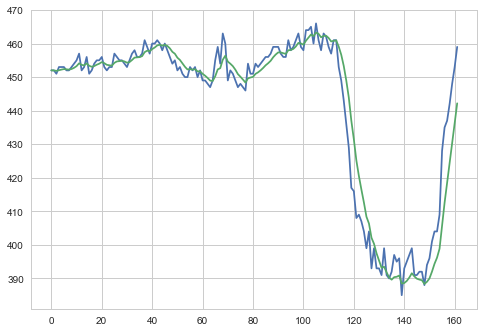

In [28]:
plt.plot(x_min_m)
plt.plot(x_min_f)

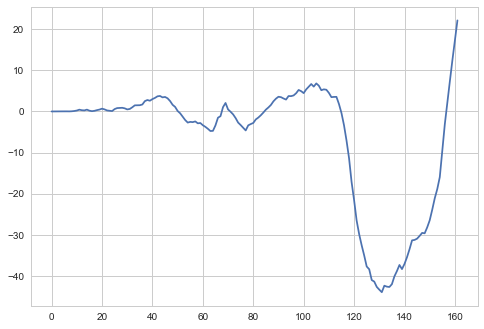

In [29]:
plt.plot(vx_min_f)

2.86875


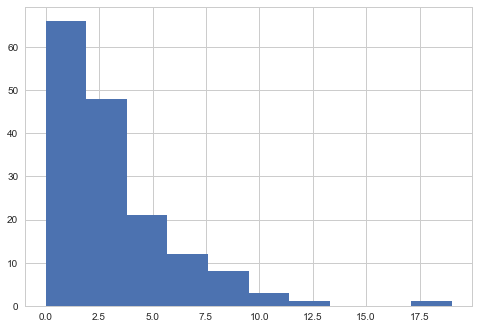

In [30]:
plt.hist(x_min_error_prev)
print(np.mean(x_min_error_prev))

5.00584318437


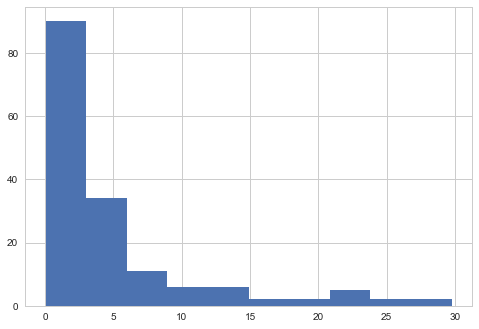

In [31]:
plt.hist(x_min_error_filter)
print(np.mean(x_min_error_filter))